# `matplotlib`: trying to recreate Napoleon's 1812 March on Moscow famous visualization.

## Imports

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [35]:
# DEV
from datetime import date

metadata_dict = {
    "Title": "Twitter Matplotlib tutorial",
    "Author": "Pawel Jastrzebski (pawjast)",
    "Description": "https://medium.com/@pawjast https://twitter.com/pawjast https://github.com/pawjast www.linkedin.com/in/pawjast https://www.youtube.com/@pawjast",
    "Creation Time": f"{date.today():%d %B %Y}",
    "Source": "https://twitter.com/pawjast"
}

## Data - troops

In [36]:
df = pd.read_csv(
    f"../data/napoleon march on moscow/troops.csv",
)


In [37]:
df


,long,lat,survivors,direction,group
0,24.0,54.9,340000,A,1
1,24.5,55.0,340000,A,1
2,25.5,54.5,340000,A,1
3,26.0,54.7,320000,A,1
4,27.0,54.8,300000,A,1
5,28.0,54.9,280000,A,1
6,28.5,55.0,240000,A,1
7,29.0,55.1,210000,A,1
8,30.0,55.2,180000,A,1
9,30.3,55.3,175000,A,1


### Normalize nr of survivors (min-max norm)

In [38]:
norm_range = df["survivors"].max() - df["survivors"].min()

df["survivors_norm"] = 0.65*((df["survivors"] - df["survivors"].min()) / norm_range)

df.head(10)

,long,lat,survivors,direction,group,survivors_norm
0,24.0,54.9,340000,A,1,0.650000
1,24.5,55.0,340000,A,1,0.650000
2,25.5,54.5,340000,A,1,0.650000
3,26.0,54.7,320000,A,1,0.611310
4,27.0,54.8,300000,A,1,0.572619
5,28.0,54.9,280000,A,1,0.533929
6,28.5,55.0,240000,A,1,0.456548
7,29.0,55.1,210000,A,1,0.398512
8,30.0,55.2,180000,A,1,0.340476
9,30.3,55.3,175000,A,1,0.330804


In [39]:
df.describe()

,long,lat,survivors,group,survivors_norm
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,28.974510,54.927451,91217.647059,1.431373,0.168725
std,4.389389,0.513061,101718.611288,0.700140,0.196777
min,24.000000,54.100000,4000.000000,1.000000,0.000000
25%,24.800000,54.400000,20000.000000,1.000000,0.030952
50%,28.300000,54.900000,40000.000000,1.000000,0.069643
75%,32.000000,55.300000,113550.000000,2.000000,0.211927
max,37.700000,55.800000,340000.000000,3.000000,0.650000


### Duplicate rows to create step effect in the plot

In [40]:
new_df = df.loc[df.index.repeat(2)].reset_index(drop=True)

In [41]:
new_df

,long,lat,survivors,direction,group,survivors_norm
0,24.0,54.9,340000,A,1,0.650000
1,24.0,54.9,340000,A,1,0.650000
2,24.5,55.0,340000,A,1,0.650000
3,24.5,55.0,340000,A,1,0.650000
4,25.5,54.5,340000,A,1,0.650000
...,...,...,...,...,...,...
97,24.6,55.8,6000,R,3,0.003869
98,24.2,54.4,6000,R,3,0.003869
99,24.2,54.4,6000,R,3,0.003869
100,24.1,54.4,6000,R,3,0.003869


## Data - locations

In [42]:
df_locations = pd.read_csv(
    f"../data/napoleon march on moscow/cities.csv",
)
df_locations

,long,lat,city
0,24.0,55.0,Kowno
1,25.3,54.7,Wilna
2,26.4,54.4,Smorgoni
3,26.8,54.3,Moiodexno
4,27.7,55.2,Gloubokoe
5,27.6,53.9,Minsk
6,28.5,54.3,Studienska
7,28.7,55.5,Polotzk
8,29.2,54.4,Bobr
9,30.2,55.3,Witebsk


## Grouping

In [43]:
grouped=df.groupby(["direction", "group"])

In [44]:
for name, group in grouped:
    print(name, "\n")
    print(group, "\n\n")


('A', 1) 

    long   lat  survivors direction  group  survivors_norm
0   24.0  54.9     340000         A      1        0.650000
1   24.5  55.0     340000         A      1        0.650000
2   25.5  54.5     340000         A      1        0.650000
3   26.0  54.7     320000         A      1        0.611310
4   27.0  54.8     300000         A      1        0.572619
5   28.0  54.9     280000         A      1        0.533929
6   28.5  55.0     240000         A      1        0.456548
7   29.0  55.1     210000         A      1        0.398512
8   30.0  55.2     180000         A      1        0.340476
9   30.3  55.3     175000         A      1        0.330804
10  32.0  54.8     145000         A      1        0.272768
11  33.2  54.9     140000         A      1        0.263095
12  34.4  55.5     127100         A      1        0.238140
13  35.5  55.4     100000         A      1        0.185714
14  36.0  55.5     100000         A      1        0.185714
15  37.6  55.8     100000         A      1   

## Plot

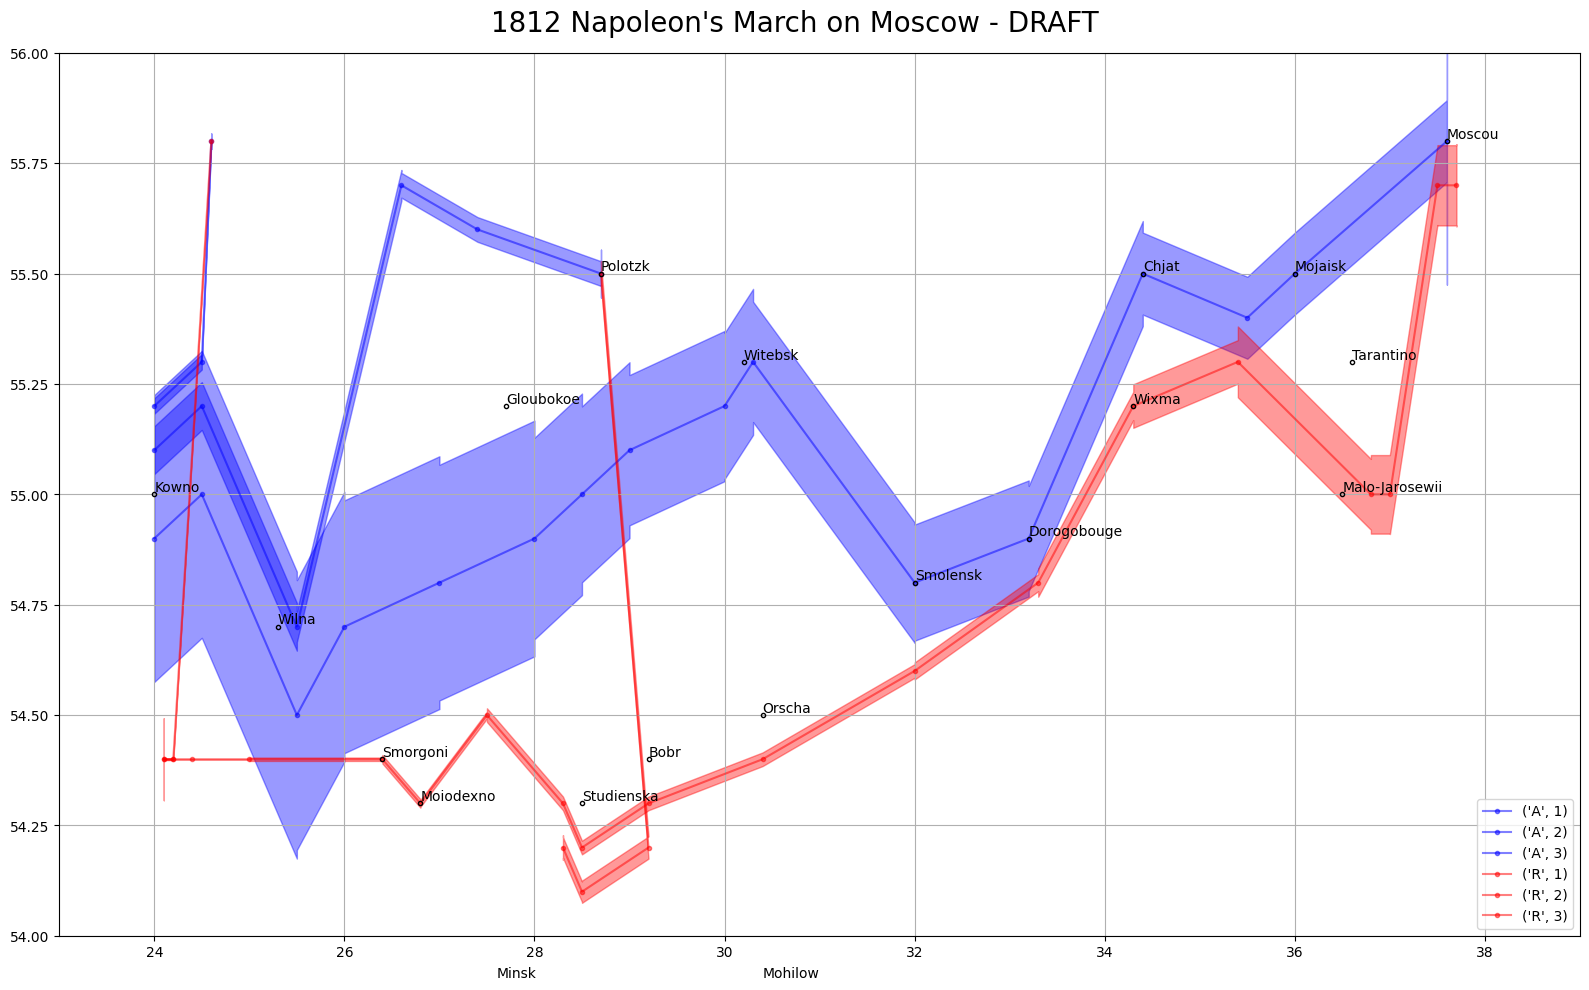

In [45]:
fig, ax = plt.subplots(
    figsize=(16,10),
    facecolor="white"
)
fig.suptitle(
    "1812 Napoleon's March on Moscow - DRAFT",
    fontsize=20,
)

# Plot march line and soldiers
for name, group in grouped:
    if name[0] == "A":
        colour = "blue"
    else:
        colour = "red"

    ax.plot(
        group["long"],
        group["lat"],
        color=colour,
        marker=".",
        label=name,
        alpha=0.5
    )

    sur = np.reshape(np.vstack(
        (group["survivors_norm"].values,
        np.roll(group["survivors_norm"].values, -1))
    ).T, -1)

    ax.fill_between(
        x=np.repeat(group["long"].values, 2),
        y1=np.repeat(group["lat"].values, 2)-0.5*sur,
        y2=np.repeat(group["lat"].values, 2)+0.5*sur,
        color=colour,
        alpha=0.4
    )


# plot cities
ax.plot(
    df_locations["long"],
    df_locations["lat"],
    linestyle="none",
    marker="o",
    markersize=3,
    markeredgecolor="black",
    markerfacecolor="none"
)

# add city labels
for _, row in df_locations.iterrows():
    ax.text(
        x=row[0],
        y=row[1],
        s=row[2],
        va="bottom"
    )

ax.set_ylim(54, 56)
ax.set_xlim(23, 39)

ax.legend(loc="lower right")
ax.grid()

plt.tight_layout()

# plt.savefig(
#     fname="name.png",
#     format="png",
#     dpi=125,
#     metadata=metadata_dict
# );

In [46]:
group

,long,lat,survivors,direction,group,survivors_norm
48,24.6,55.8,6000,R,3,0.003869
49,24.2,54.4,6000,R,3,0.003869
50,24.1,54.4,6000,R,3,0.003869


In [47]:
group["long"].values

array([24.6, 24.2, 24.1])

In [48]:
np.repeat(group["long"].values, 2)

array([24.6, 24.6, 24.2, 24.2, 24.1, 24.1])

In [49]:
group["survivors_norm"].values

array([0.00386905, 0.00386905, 0.00386905])

In [50]:
np.reshape(np.vstack(
    (group["survivors_norm"].values,
    np.roll(group["survivors_norm"].values, -1))
).T, -1)

array([0.00386905, 0.00386905, 0.00386905, 0.00386905, 0.00386905,
       0.00386905])